In [1]:
import pickle
import glob
import numpy
import matplotlib.pyplot as plt
import traceback
from astropy.stats import mad_std


In [2]:
pickles = glob.glob('*.pickle')

Text(0.5, 0, 'gain/deg')

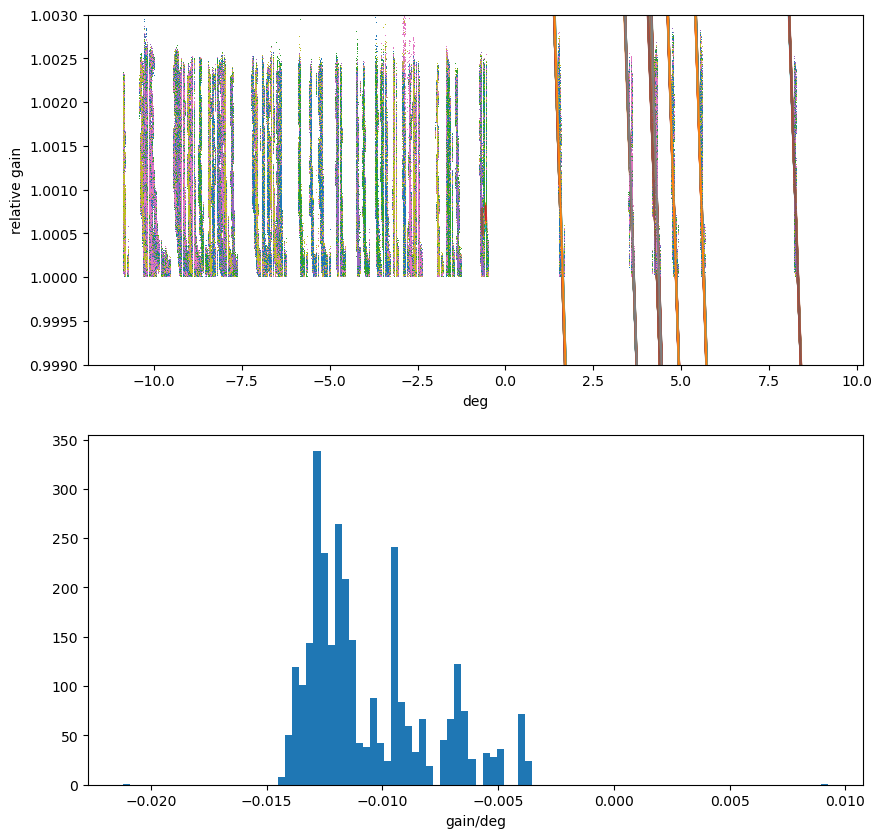

In [15]:
fig,axs=plt.subplots(2,1,figsize=(10,10),sharex=False,sharey=False)

slopes = {}
sigmas = []
temps = {}

for apickle in pickles:
    try:
#        print(apickle)
        with open(apickle,'rb') as f:
            data=pickle.load(f)
        name=list(data.keys())[0]
        for amp in data[name]:
            axs[0].plot(data[name][amp]['x'],data[name][amp]['y'],",")

            xmin = data[name][amp]['x'].min()
            xmax = data[name][amp]['x'].max()
            x=numpy.arange(xmin*0.9,xmax*1.1,0.001)
            y=data[name][amp]['slope']*x+data[name][amp]['intercept']
            sigmas.append(data[name][amp]['std_err'])
            axs[0].plot(x,y,'-')
            slopes.setdefault( name, {} )[amp] = data[name][amp]['slope'] 
            temps.setdefault( name, {} )[amp] = data[name][amp]['x'].max()


    except:
        traceback.print_exc()
axs[1].hist( numpy.array([ list(a.values()) for a in slopes.values() ]).flatten(), bins=100 ) #, range=(-0.0015,-0.000) )
axs[0].set_ylim(0.999,1.003)
axs[0].set_xlabel('deg')
axs[0].set_ylabel('relative gain')
axs[1].set_xlabel('gain/deg')

-1.16e-02 (+/-) 6.77e-07


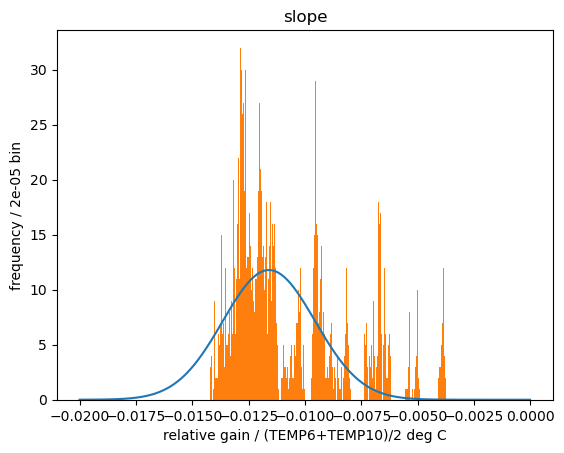

In [10]:
dx=0.00002
xmin= -0.02 # -0.0015
xmax=0.
x=numpy.arange(xmin,xmax,dx)
relgain=numpy.array([ list(a.values()) for a in slopes.values() ]).flatten()
mu=numpy.median(relgain)
sigma=mad_std(relgain)
print(f"{mu:.2e} (+/-) {sigma/len(relgain):.2e}")
# relgain.mean())
plt.plot(x,numpy.exp( -(x-mu)**2/(2*sigma**2) )/numpy.sqrt(2*numpy.pi*sigma**2)*len(relgain)*dx)
plt.hist( numpy.array([ list(a.values()) for a in slopes.values() ]).flatten(), bins=int((xmax-xmin)/dx), range=(xmin,xmax) )
plt.xlabel('relative gain / (TEMP6+TEMP10)/2 deg C')
plt.ylabel(f'frequency / {dx} bin')
plt.title('slope')
plt.savefig('relgain.pdf')

Text(0, 0.5, 'slopes')

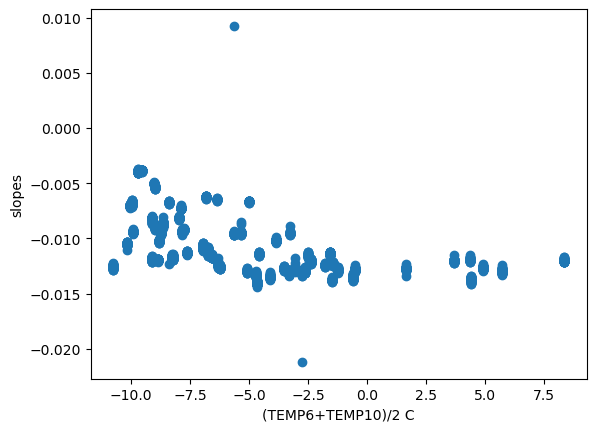

In [27]:
plt.plot(
    numpy.array([ list(a.values()) for a in temps.values() ]).flatten(),
    numpy.array([ list(a.values()) for a in slopes.values() ]).flatten(),
    "o"
)
plt.xlabel('(TEMP6+TEMP10)/2 C')
plt.ylabel('slopes')

In [30]:
data.keys()

dict_keys(['R31_S20'])

Text(0.5, 1.0, '$\\sigma_{\\rm slope}$')

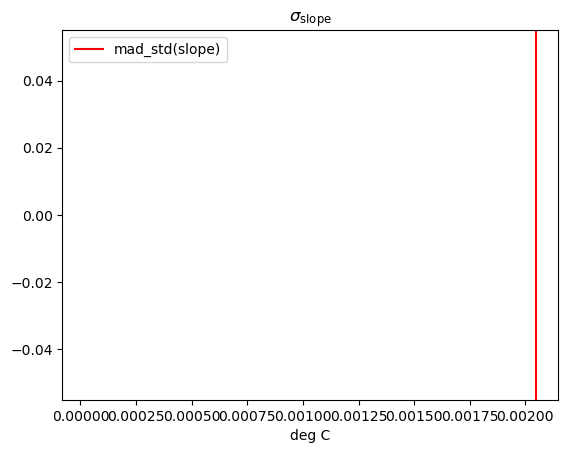

In [31]:
sensor='R31_S20'
amps=data[sensor].keys()
plt.hist(sigmas,bins=20,range=(2e-5,1.2e-4))
plt.axvline(sigma,label='mad_std(slope)',color='red')
plt.legend()
plt.xlabel('deg C')
#plt.ylabel(f'Frequency')
plt.title(rf'$\sigma_{{\rm slope}}$')

Text(0.5, 0, 'deg')

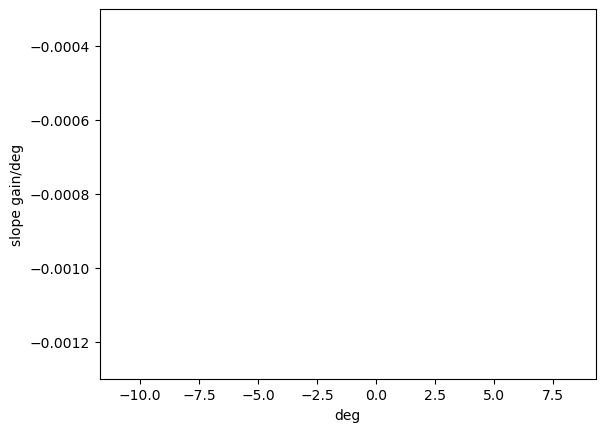

In [32]:
plt.scatter(
    numpy.array([ list(a.values()) for a in temps.values() ] ).flatten(),
    numpy.array([ list(a.values()) for a in slopes.values() ] ).flatten(),
    s=1
)
plt.ylim(-0.0013,-0.0003)
plt.ylabel('slope gain/deg')
plt.xlabel('deg')